# 1. Introduction

In the past few missions, you've learned how to use Pandas to analyze data quickly and efficiently. You applied this knowledge by creating guided projects to solidify your knowledge. You'll go further in this project, and you'll build an end-to-end data analysis project on your own, using Pandas and Python.



## 2. The data

In this project, you'll be working with crime data from [Montgomery County, MD](https://en.wikipedia.org/wiki/Montgomery_County,_Maryland). Each row in the data is a crime reported by a law enforcement officer in <span style="background-color: #F9EBEA; color:##C0392B">2013</span> and entered into a database.

You'll want to download the data from the repository. After downloading the data, you'll want to create a new Jupyter notebook in the same folder, and ensure that any code or analysis you do on the data occurs in that notebook.

You can load the data in and display the first <span style="background-color: #F9EBEA; color:##C0392B">5</span> rows to get a better idea of the structure:

>```python
import pandas as pd
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()
```

You'll also want to display all of the column names with:

>```python
crimes.columns
```
>```python
Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')
```

After displaying some of the data, make sure you look through and understand each column. It can be helpful to display the first few values in each column in order to understand it better. It can also be useful to perform a Google search to help give you context for columns. For example, looking up <span style="background-color: #F9EBEA; color:##C0392B">Police District Number Montgomery County</span> bring you to this [page](https://www.montgomerycountymd.gov/pol/districts/map.html), which helps you understand them. Make sure to write up a Markdown cell explaining anything relevant that you learned.

You'll also want to explore missing values in each column. Why do you think certain columns have missing values? Make sure to write up your thoughts on missing values, and how they'll impact your analysis.

Also make sure to look at the format of each column. For example, <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span> is a float column, but if you know about Zip codes in the US, you know that they're always integers. Keeping that this column is of the "wrong" type in mind will help you as you analyze the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()

Incident ID  CR Number    Dispatch Date / Time  Class  \
0    200939101   13047006  10/02/2013 07:52:41 PM    511   
1    200952042   13062965  12/31/2013 09:46:58 PM   1834   
2    200926636   13031483  07/06/2013 09:06:24 AM   1412   
3    200929538   13035288  07/28/2013 09:13:15 PM   2752   
4    200930689   13036876  08/06/2013 05:16:17 PM   2812   

                     Class Description Police District Name  \
0                 BURG FORCE-RES/NIGHT                OTHER   
1           CDS-POSS MARIJUANA/HASHISH           GERMANTOWN   
2              VANDALISM-MOTOR VEHICLE   MONTGOMERY VILLAGE   
3  FUGITIVE FROM JUSTICE(OUT OF STATE)             BETHESDA   
4          DRIVING UNDER THE INFLUENCE             BETHESDA   

         Block Address           City State  Zip Code      ...       Sector  \
0  25700  MT RADNOR DR       DAMASCUS    MD   20872.0      ...          NaN   
1   GUNNERS BRANCH  RD     GERMANTOWN    MD   20874.0      ...            M   
2      OLDE TOWNE  AVE   GAITHERSBURG    MD   20877.0      ...            P   
3            BEACH  DR    CHEVY CHASE    MD   20815.0      ...            D   
4            BEACH  DR  SILVER SPRING    MD   20815.0      ...            D   

  Beat    PRA       Start Date / Time  End Date / Time Latitude Longitude  \
0  NaN    NaN  10/02/2013 07:52:00 PM              NaN      NaN       NaN   
1  5M1  470.0  12/31/2013 09:46:00 PM              NaN      NaN       NaN   
2  6P3  431.0  07/06/2013 09:06:00 AM              NaN      NaN       NaN   
3  2D1   11.0  07/28/2013 09:13:00 PM              NaN      NaN       NaN   
4  2D3  178.0  08/06/2013 05:16:00 PM              NaN      NaN       NaN   

   Police District Number  Location Address Number  
0                   OTHER       NaN        25700.0  
1                      5D       NaN            NaN  
2                      6D       NaN            NaN  
3                      2D       NaN            NaN  
4                      2D       NaN            NaN  

[5 rows x 22 columns]

## 3. Analyzing the times of crimes

The  <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column looks very interesting, because it allows us to figure out when crimes are most likely to occur. You can use this column to answer questions like:

- What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)
- During what time of day are the most crimes committed?
- During what month are the most crimes committed?

You can answer these questions by first parsing the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column using the [pandas.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function, like this:

>```python
d_time = pandas.to_datetime(crimes["Dispatch Date / Time"])
```

After doing the type conversion, you'll need to extract the components of the datetime you're interested in. You can see documentation for this [here](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties). After the extraction, you can use the <span style="background-color: #F9EBEA; color:##C0392B">pandas.Series.value_counts</span> method to count up the items you want.

There is some nuance around counting up the time of day when crimes are committed. You'll have to decide how you want to define "time of day". This can be as simple as using the hour, or as complex as assigning categories to certain times, like "morning", "afternoon", "evening", and "night".

As you answer these questions, make sure to document your code, and add in explanations after each cell. Your explanations should discuss the answer, along with anything interesting your discovered.

Were you surprised by your findings? Why do you think that crimes follow the patterns that they do? It may be useful to do some research here to see if you can find support for your theories.

After you're done, take a look at the <span style="background-color: #F9EBEA; color:##C0392B">End Date / Time</span> and <span style="background-color: #F9EBEA; color:##C0392B">Start Date / Time</span> columns. Are these different from the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column? Would it be useful to use one or both of those columns to do this analysis instead?


<div class="alert alert-info" role="alert">
  <strong>Answers</strong>
</div>

#### What day of the week are the most crimes committed on?

To find what was the day of the week where the most crimes where commited, we first used the function 'weekday_name' to convert the date into name of the day of the week. In sequence, the frequency was found by 'value_counts()' and plotted in a bar chart. 

Tuesday      3836
Monday       3734
Wednesday    3611
Friday       3594
Thursday     3404
Saturday     2807
Sunday       2383
Name: Dispatch Date / Time, dtype: int64


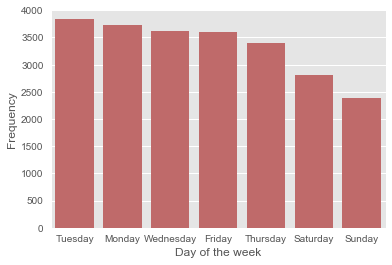

In [39]:
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])
d_week = d_time.dt.weekday_name
print(d_week.value_counts())
ax = sns.barplot(x=d_week.value_counts().index,y=d_week.value_counts(), color="indianred")
ax.set(ylim=(0, 4000))
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')

We observe that the beginning of the week is where occur the higher amount of crimes. The difference between tuesday and sunday is approximately 40%.

#### During what time of day are the most crimes committed?

Speaking of time, the same strategy was used. 'value counts' to know the frequency related to the hours.

7     1278
9     1222
16    1211
15    1179
8     1174
14    1142
13    1132
18    1119
10    1116
17    1115
11    1105
6     1076
20    1065
12    1063
23    1039
19    1030
22    1022
21    1012
0      904
1      855
2      684
3      376
4      228
5      222
Name: Dispatch Date / Time, dtype: int64


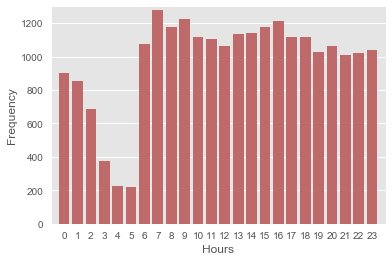

In [40]:
hour = d_time.dt.hour
print(hour.value_counts())
ax = sns.barplot(x=hour.value_counts().index,y=hour.value_counts(), color="indianred")
ax.set(ylim=(0, 1300))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')

Taking a look closer in the chart, we observe that the beginning of the day is the period with less occurrence of crimes.

#### During what month are the most crimes committed?

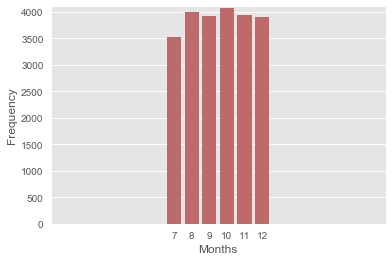

In [41]:
month = d_time.dt.month
#print(month.value_counts())
ax = sns.barplot(x=month.value_counts().index,y=month.value_counts(), color="indianred")
ax.set(ylim=(0, 4100))
ax.set(xlim=(-7, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')


In this chart we can see that the data were obtained from July. The number of crimes is somewhat homogenous between the months, with an average of 3894 occurrences per month.

The following analysis shows us the period of the day the crimes occurred.
Were used for analysis:
- Morning (0:01-12:00)
- Afternoon (12:01-18:00)
- Evening (18:01-21:00)
- Night (21:01-0:00)

In [45]:
def which_period(row):
    time = pd.Series(data=row['Dispatch Date / Time'])
    time.index = pd.to_datetime(time)
    
    if not time.between_time(start_time="00:01", end_time="12:00").empty:
        return "Morning"
    elif not time.between_time(start_time="12:01", end_time="18:00").empty:
        return "Afternoon"
    elif not time.between_time(start_time="18:01", end_time="21:00").empty:
        return "Evening"
    elif not time.between_time(start_time="21:01", end_time="00:00").empty:
        return "Night"
    
crimes["Period"] = crimes.apply(which_period, axis=1)

In [44]:
print('Morning')
print(len(crimes[crimes["Period"] == 'Morning']))

print('Afternoon')
print(len(crimes[crimes["Period"] == 'Afternoon']))

print('Evening')
print(len(crimes[crimes["Period"] == 'Evening']))

print('Night')
print(len(crimes[crimes["Period"] == 'Night']))

Morning
10223
Afternoon
6824
Evening
3192
Night
3063


Although the dawn is the period with the least occurrence of crimes, we can see that the morning period up to noon, compensates this data and ends up surpassing the result of the afternoon and night.

The same techniques were applied in the 'End Date / Time' and 'Start Date / Time' columns. And we realize that for better analysis and consistency of data, the column 'Start Date / Time' is the most indicated. The column that represents the end time of the crime has null fields, which can generate incosistency in the analysis.

#### Analysis using  End Date / Time 

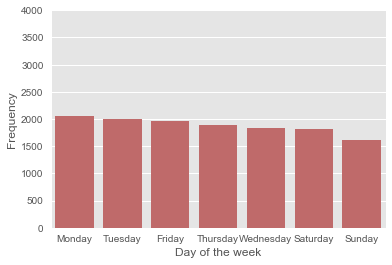

In [46]:
##End Date / Time 
d_time2 = pd.to_datetime(crimes["End Date / Time"])
##What day of the week are the most crimes committed on?
d_week2 = d_time2.dt.weekday_name
#print(d_week2.value_counts())
ax = sns.barplot(x=d_week2.value_counts().index,y=d_week2.value_counts(), color="indianred")
ax.set(ylim=(0, 4000))
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')

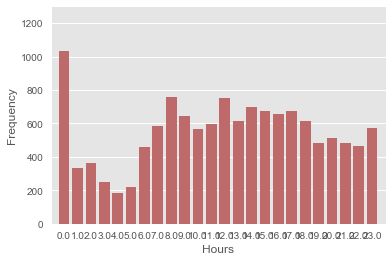

In [47]:
##During what time of day are the most crimes committed?
hour2 = d_time2.dt.hour
#print(hour2.value_counts())
ax = sns.barplot(x=hour2.value_counts().index,y=hour2.value_counts(), color="indianred")
ax.set(ylim=(0, 1300))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')

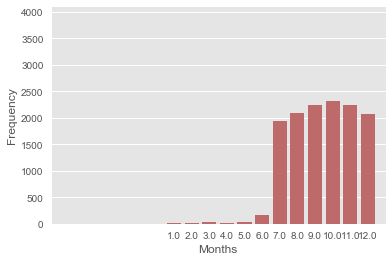

In [48]:
##During what month are the most crimes committed?
month2 = d_time2.dt.month
#print(month2.value_counts())
ax = sns.barplot(x=month2.value_counts().index,y=month2.value_counts(), color="indianred")
ax.set(ylim=(0, 4100))
ax.set(xlim=(-7, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')

#### Analysis using  Start Date / Time 

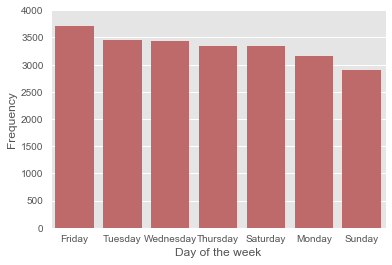

In [49]:
##Start Date / Time 
d_time3 = pd.to_datetime(crimes["Start Date / Time"])
##What day of the week are the most crimes committed on?
d_week3 = d_time3.dt.weekday_name
#print(d_week3.value_counts())
ax = sns.barplot(x=d_week3.value_counts().index,y=d_week3.value_counts(), color="indianred")
ax.set(ylim=(0, 4000))
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')

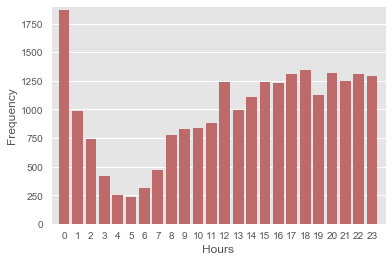

In [50]:
##During what time of day are the most crimes committed?
hour3 = d_time3.dt.hour
#print(hour3.value_counts())
ax = sns.barplot(x=hour3.value_counts().index,y=hour3.value_counts(), color="indianred")
ax.set(ylim=(0, 1900))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')

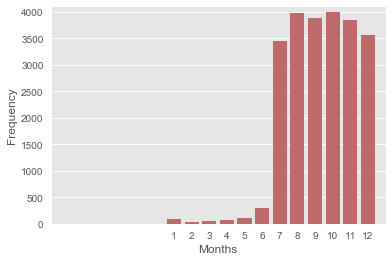

In [51]:
##During what month are the most crimes committed?
month3 = d_time3.dt.month
#print(month3.value_counts())
ax = sns.barplot(x=month3.value_counts().index,y=month3.value_counts(), color="indianred")
ax.set(ylim=(0, 4100))
ax.set(xlim=(-7, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')

#### Comparing Dispatcher, End and Start Times

In [52]:
#dispatcher
d_time_null = pd.isnull(d_time)
print(len(d_time_null[d_time_null == True]))
#End
d_time_null2 = pd.isnull(d_time2)
print(len(d_time_null2[d_time_null2 == True]))
#Start
d_time_null3 = pd.isnull(d_time3)
print(len(d_time_null3[d_time_null3 == True]))

0
10178
0


## 4. Analyzing locations of crimes

There are a few columns that encode information about the location of crimes:

- <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Block Address</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Sector</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Beat</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Police District Number</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Location</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Address Number</span>

These columns have varying numbers of missing values, and varying granularity. Some of the columns represent areas with large granularity (like police districts), whereas some represent areas with small granularity, like <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>, and <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>.


In order to decide which column to use to analyze the locations of crimes, you need to utilize the following criteria:

- **Granularity**. Areas that are too small aren't great, because only a few crimes were committed inside them, which makes it hard to analyze and compare. For example, if I tell you that Silver Spring (a city in Montgomery County) is the place with the most crimes, you'll know to avoid that area. However, if I tell you that a 100 foot section of Silver Spring has the most crimes, it won't be as helpful (it's unlikely that you'll ever be in that 100 foot section).
- **Comprehensibility**. You looked up the Police District map of Montgomery County before, so it's simple to tell what area corresponds to district <span style="background-color: #F9EBEA; color:##C0392B">6</span>. However, what area does Beat <span style="background-color: #F9EBEA; color:##C0392B">5M1</span> correspond to? You may be able to look this up, but it's harder to comprehend.
- **Missing values**. If a column has a lot of missing values, that means that the conclusions you draw are less valid, because you don't know if the missing data is systematic (ie all data for a given district is missing) or random (equal amounts of data are missing from each district). You should try to select a column that has minimal missing values.

Based on the above criteria, pick a column that you want to use to analyze location. After picking a column, see if you can answer these questions:

- In what area did the most crimes occur? What physical locations (like cities) does this area correspond to?
- Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, [this](https://www.montgomerycountymd.gov/POL/Resources/Files/crime/MCP2015AnnualCrimeReportFINAL.pdf) annual report has per-district populations towards the bottom.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.


<div class="alert alert-info" role="alert">
  <strong>Answers</strong>
</div>

Because Latitude and Longitude, Location, Address Number, Block Address and Zip Code do not properly represent significant amounts of crimes, they do not meet the granularity criterion. The Beat information covers a greater number of crimes, but does not meet the criterion of comprehensibility. So, Sector and Police District could be used for this location analysis.
However, given that the available dataset contains some rows with unfilled Sector columns (0.034%), while the Police District has been informed for all occurrences of crimes, the geographical division of Montgomery County into districts may be considered best suited for this analysis.

The code below checks the percentage of null values in the column <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>. The same can be made for any column, just changing the value of <code>area_dsc</code> variable.

In [7]:
area_dsc = "Police District Name"

area = crimes[area_dsc]
area_is_null = pd.isnull(area)
area_not_null = area[~area_is_null]
area_null = area[area_is_null]

percentage_null = len(area_null)*100/len(area_not_null)
print(percentage_null)

0.0


To get the area where the most crimes occur, it's necessary, first, to drop the rows with null values in the corresponding column (indifferent to area <span style="background-color: #F9EBEA; color:##C0392B"> Police District Number </span>). And then, grouping the number of occurrences by area will indicate the area with the most crimes through a descending sort operation.

SILVER SPRING


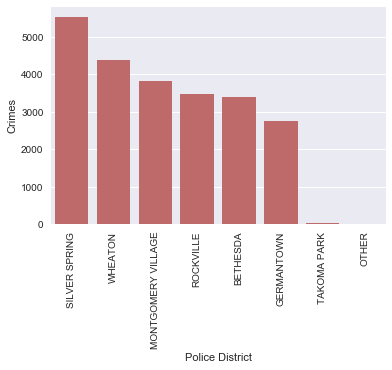

In [10]:
crimes_area_not_null = crimes.dropna(axis=0, subset=[area_dsc])
crimes_by_area = crimes_area_not_null.groupby(area_dsc)[area_dsc].count()
crimes_by_area_sorted = crimes_by_area.sort_values(inplace=False, ascending=False)

ax = sns.barplot(x=crimes_by_area_sorted.index,y=crimes_by_area_sorted, color="indianred")
ax.set_ylabel('Crimes')
ax.set_xlabel('Police District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

area_most_crimes = crimes_by_area_sorted.index[0]
print(area_most_crimes)

The cities, or any other physical location, correspondig to the chosen area can be obtained by checking the distinct values of the physical location column, only in the rows where the area is SILVER SPRING (identified as the area with most crimes).

In [9]:
locations = crimes_area_not_null[crimes_area_not_null[area_dsc] == area_most_crimes]["City"].unique()
print(locations)

['SILVER SPRING' 'BURTONSVILLE' 'TAKOMA PARK' 'CHEVY CHASE' 'SPENCERVILLE'
 'LAUREL']


The population data by district is necessary to get the crimes per capita in each district. The numbers used here is regarding to 2015. The <code>crimes_by_area</code> serie was divided by the serie created with the population data.

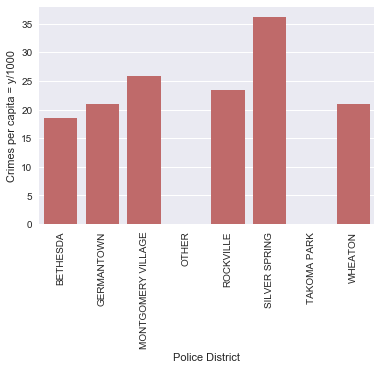

In [14]:
population_by_area = pd.Series([149118, 182883, 152991, 208263, 131391, 147486],
        index=["ROCKVILLE","BETHESDA","SILVER SPRING","WHEATON","GERMANTOWN","MONTGOMERY VILLAGE"])

crimes_per_capita = crimes_by_area.divide(population_by_area) * 1000
ax = sns.barplot(x=crimes_per_capita.index,y=crimes_per_capita, color="indianred")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Crimes per capita = y/1000')
ax.set_xlabel('Police District')

## 5. Analyzing types of crime

The <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> column tells us something about the type of crime that was committed. We can use this column to discover which crimes are committed most often.

Here are some initial questions to answer:

- Which crimes are the most common? Least common?
- Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" (mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?

To manually split up violent and nonviolent crimes, just assign each crime to a category. For example, <span style="background-color: #F9EBEA; color:##C0392B">ASSAULT & BATTERY - CITIZEN</span> is violent, and <span style="background-color: #F9EBEA; color:##C0392B">VANDALISM-MOTOR VEHICLE</span> is nonviolent. It may be useful to create a column called <span style="background-color: #F9EBEA; color:##C0392B">Violent</span>, and then use the [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method to assign **True** or **False** to each row in the column. For example, if **ASSAULT** is in Class Description, it's violent, but if **LARCENY** is in Class Description, it's nonviolent.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

<div class="alert alert-info" role="alert">
  <strong>ANSWERS</strong>
</div>

<p>
The most common crimes are obtained by making a pivot table that groups the column <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> and counts the occurrences of <span style="background-color: #F9EBEA; color:##C0392B">Incident ID</span> column. So, the method `Dataframe.pivot_table()` is used to this end and its result is assigned to `group_classes` variable. In sequence, the <span style="background-color: #F9EBEA; color:##C0392B">Incident ID</span> column is renamed to <span style="background-color: #F9EBEA; color:##C0392B">Count</span> and the method `Dataframe.reset_index()`, in this case, returns a new dataframe with <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> and <span style="background-color: #F9EBEA; color:##C0392B">Count</span> columns. In conclusion, the method `Dataframe.sort_values()` sorts the data by the <span style="background-color: #F9EBEA; color:##C0392B">Count</span> column to get the most common and the least common crimes.
</p>

In [2]:
group_classes = crimes.pivot_table(index='Class Description', values=['Incident ID'], aggfunc='count')
group_classes.rename(columns={'Incident ID':'Count'}, inplace=True)
group_classes.reset_index(inplace=True)

# Which crimes are the most common?
group_classes.sort_values(by='Count', ascending=False).head(5)

Class Description  Count
106      DRIVING UNDER THE INFLUENCE   1710
89        CDS-POSS MARIJUANA/HASHISH   1334
188                  POL INFORMATION   1191
158      LARCENY FROM AUTO OVER $200    914
162  LARCENY FROM BUILDING OVER $200    895

In [3]:
# Which crimes are the least common?
group_classes.sort_values(by='Count').head(5) # Five least common (but there are 31 crimes with count = 1)

Class Description  Count
0                 ABANDONED AUTO      1
207  ROB KNIFE/CUT - CONV. STORE      1
21      ANIMAL OFFENSE - HOT CAR      1
187             PARKING OFFENSES      1
154   LARCENY COIN MACH $50-$199      1

<p>
To split the type of crimes into "Violent" and "Nonviolent", an array of common keywords of violent crimes is used. The method `Dataframe.apply()` iterates through each row in the dataframe and performs a search of the array's keywords on each <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> attribute. If the row contains a crime whose description has any of the keywords, it is classified as violent. Otherwise, the crime is nonviolent.
</p>

In [5]:
# Can you split the types of crimes manually into "Violent" and "Nonviolent"?

keywords = ['ASSAULT','RAPE','HOMICIDE','ARSON','ABUSE','KIDNAPPING','AGG ASSLT','DRIVING UNDER',
            'BURG FORCE','BOMB','FIRE OTHER','ROB ','SEX OFFENDER', 'EXPLOSIVE']

def is_violent(row):
    class_description = row["Class Description"]
    return any(word in class_description for word in keywords)
        
violent = crimes.apply(is_violent, axis=1)
crimes['Violent'] = violent

crimes.head(3)

Incident ID  CR Number    Dispatch Date / Time  Class  \
0    200939101   13047006  10/02/2013 07:52:41 PM    511   
1    200952042   13062965  12/31/2013 09:46:58 PM   1834   
2    200926636   13031483  07/06/2013 09:06:24 AM   1412   

            Class Description Police District Name        Block Address  \
0        BURG FORCE-RES/NIGHT                OTHER  25700  MT RADNOR DR   
1  CDS-POSS MARIJUANA/HASHISH           GERMANTOWN   GUNNERS BRANCH  RD   
2     VANDALISM-MOTOR VEHICLE   MONTGOMERY VILLAGE      OLDE TOWNE  AVE   

           City State  Zip Code   ...      PRA       Start Date / Time  \
0      DAMASCUS    MD   20872.0   ...      NaN  10/02/2013 07:52:00 PM   
1    GERMANTOWN    MD   20874.0   ...    470.0  12/31/2013 09:46:00 PM   
2  GAITHERSBURG    MD   20877.0   ...    431.0  07/06/2013 09:06:00 AM   

  End Date / Time Latitude  Longitude Police District Number Location  \
0             NaN      NaN        NaN                  OTHER      NaN   
1             NaN      NaN        NaN                     5D      NaN   
2             NaN      NaN        NaN                     6D      NaN   

   Address Number  Difference Violent  
0         25700.0    00:00:41    True  
1             NaN    00:00:58   False  
2             NaN    00:00:24   False  

[3 rows x 24 columns]

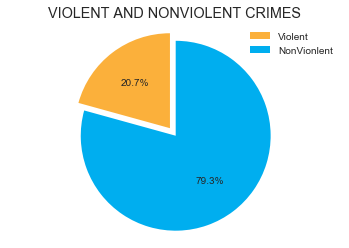

In [80]:
# Pie chart
labels = ['Violent', 'NonVionlent']
total_rows = crimes.shape[0]

total_violent = len(crimes['Violent'][crimes['Violent'] == True])
total_nonviolent = 1 - total_violent/total_rows
sizes = [total_violent/total_rows, total_nonviolent]
colors = ['#fbb03b', '#00aeef']

plt.title("VIOLENT AND NONVIOLENT CRIMES")
plt.style.use('ggplot')
plt.pie(sizes, explode=(0.1,0), colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

<p>
The most common violent and nonviolent crimes are obtained using the same method of the first answer about most common crimes. However, the pivot table groups two columns this time: <span style="background-color: #F9EBEA; color:##C0392B">Violent</span> and <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span>. Then, the number of crimes is counted as before. Finally, the method `Dataframe.sort_values()` is used to sort by the <span style="background-color: #F9EBEA; color:##C0392B">Violent</span> and <span style="background-color: #F9EBEA; color:##C0392B">Count</span> columns and to get the most common violent and nonviolent crimes.
</p>

In [6]:
violent_classes = crimes.pivot_table(index=['Violent', 'Class Description'], values=['Incident ID'], aggfunc='count')
violent_classes.rename(columns={'Incident ID':'Count'}, inplace=True)
violent_classes.reset_index(inplace=True) #removing indexes

most_violent = violent_classes.sort_values(by=['Violent','Count'], ascending=[False, False]).head(5) #most common violent crime
most_nonviolent = violent_classes.sort_values(by=['Violent','Count'], ascending=[True, False]).head(5) #most common nonviolent crime

# What's the most common violent crime?
most_violent

Violent                 Class Description  Count
241     True       DRIVING UNDER THE INFLUENCE   1710
219     True       ASSAULT & BATTERY - CITIZEN    382
280     True          SIMPLE ASSAULT - CITIZEN    311
223     True  ASSAULT & BATTERY SPOUSE/PARTNER    290
235     True                BURG FORCE-RES/DAY    240

In [7]:
# What's the most common nonviolent crime?
most_nonviolent

Violent                Class Description  Count
49     False       CDS-POSS MARIJUANA/HASHISH   1334
140    False                  POL INFORMATION   1191
110    False      LARCENY FROM AUTO OVER $200    914
114    False  LARCENY FROM BUILDING OVER $200    895
135    False                 MENTAL TRANSPORT    841

## 6. Combine Analysis

After doing some analysis on types of crimes, you can combine our analysis with location and time data to answer more complex questions, like:

- Where are the most violent crimes committed? How about nonviolent?
- When are the most violent crimes committed? How about nonviolent?

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

<div class="alert alert-info" role="alert">
  <strong>Answers</strong>
</div>

In order to know where the most violent crimes are committed, the occurrences of crimes with class description contained in the set of most violents crimes classes were filtered and grouped by police district, as follow:

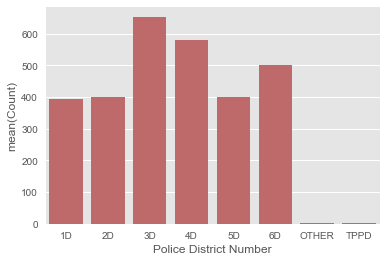

In [21]:
most_violent_count_by_area = crimes[crimes["Class Description"].isin(most_violent["Class Description"])].pivot_table(index=['Police District Number'], values=['Incident ID'], aggfunc='count')
most_violent_count_by_area.rename(columns={'Incident ID':'Count'}, inplace=True)
most_violent_count_by_area.reset_index(inplace=True) #removing indexes

sns.barplot(x=most_violent_count_by_area['Police District Number'], y=most_violent_count_by_area['Count'], color="indianred")

The nonviolent crimes were obtained similar to the violent crimes, but using the set of nonviolent crimes classes.

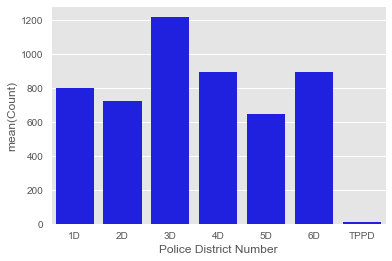

In [22]:
most_nonviolent_count_by_area = crimes[crimes["Class Description"].isin(most_nonviolent["Class Description"])].pivot_table(index=['Police District Number'], values=['Incident ID'], aggfunc='count')
most_nonviolent_count_by_area.rename(columns={'Incident ID':'Count'}, inplace=True)
most_nonviolent_count_by_area.reset_index(inplace=True) #removing indexes

sns.barplot(x=most_nonviolent_count_by_area['Police District Number'], y=most_nonviolent_count_by_area['Count'], color="blue")

<b> When are the most violent crimes committed? </b>

In order to know when the most violent crimes are committed, the occurrences of crimes with class description contained in the set of most violents crimes classes were filtered and grouped by police district, as follow:

   Dispatch Date / Time  Count
0                     7    372
1                     8    485
2                     9    532
3                    10    503
4                    11    560
5                    12    481


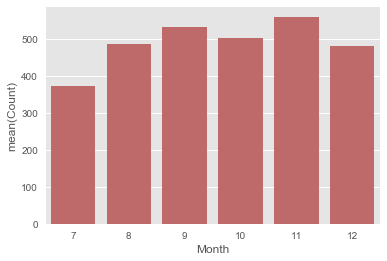

In [23]:
d_month = pd.to_datetime(crimes['Dispatch Date / Time'])
month = d_month.dt.month
most_violent_count_by_time = crimes[crimes["Class Description"].isin(most_violent["Class Description"])].pivot_table(index=month, values=['Incident ID'], aggfunc='count')
most_violent_count_by_time.rename(columns={'Incident ID':'Count'}, inplace=True)
most_violent_count_by_time.reset_index(inplace=True) #removing indexes
print(most_violent_count_by_time)

ax = sns.barplot(x=most_violent_count_by_time['Dispatch Date / Time'], y=most_violent_count_by_time['Count'], color="indianred")
ax.set(xlabel='Month')

<b> How about nonviolent? </b>

The nonviolent crimes were obtained similar to the violent crimes, but using the set of nonviolent crimes classes.

   Dispatch Date / Time  Count
0                     7    769
1                     8    890
2                     9    827
3                    10    887
4                    11    869
5                    12    933


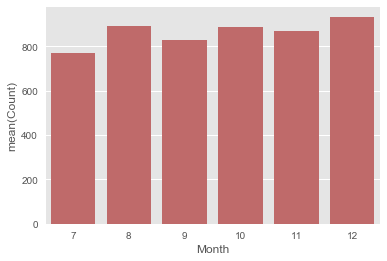

In [24]:
d_month = pd.to_datetime(crimes['Dispatch Date / Time'])
month = d_month.dt.month
most_nonviolent_count_by_time = crimes[crimes["Class Description"].isin(most_nonviolent["Class Description"])].pivot_table(index=month, values=['Incident ID'], aggfunc='count')
most_nonviolent_count_by_time.rename(columns={'Incident ID':'Count'}, inplace=True)
most_nonviolent_count_by_time.reset_index(inplace=True) #removing indexes
print(most_nonviolent_count_by_time)

ax = sns.barplot(x=most_nonviolent_count_by_time['Dispatch Date / Time'], y=most_nonviolent_count_by_time['Count'], color="indianred")
ax.set(xlabel='Month')

## 7. Posing and answering your own questions

After you've finished exploring the data and answering some directed questions, you should be able to start coming up with some of your own.

You can think of questions based on a few strategies:

- Expanding or tweaking the directed questions from earlier.
- Exploring patterns you found while exploring the data.
- Questions based on research you've done about the previous lessons

Try to think of at least three questions, then answer them the same way you did in previous screens.

<div class="alert alert-info" role="alert">
  <strong>QUESTIONS AND ANSWERS</strong>
</div>

#### 1. Which crimes the dispatch time is faster? and slowest? This changes for each district?

To find out which crimes had the fastest police response, we took the 'Dispatch Date / Time' column and decreased from 'Start Date / Time'.

In [3]:
dispatch_time = pd.to_datetime(crimes["Dispatch Date / Time"])
start_time = pd.to_datetime(crimes["Start Date / Time"])   
diff = dispatch_time - start_time
crimes['Difference'] = diff

In [6]:
diff_sort_faster = crimes.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster = pd.DataFrame(diff_sort_faster)     
faster = diff_sort_faster[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
faster.head(10)

Police District Name                  Class Description  \
23323   MONTGOMERY VILLAGE      EX PARTE/PROTECT. ORDER VIOL.   
23358   MONTGOMERY VILLAGE            LARCENY OTHER OVER $200   
5879               WHEATON   ASSAULT & BATTERY SPOUSE/PARTNER   
7748    MONTGOMERY VILLAGE             RAPE - ATTEMPT - FORCE   
12097           GERMANTOWN         SEX OFFENSE - SEX  ASSAULT   
4017            GERMANTOWN      EX PARTE/PROTECT. ORDER VIOL.   
17213           GERMANTOWN  BURG FORCE - ATTEMPT-RES/TIME UNK   
14544             BETHESDA        LARCENY FROM AUTO OVER $200   
18767   MONTGOMERY VILLAGE         CDS-POSS MARIJUANA/HASHISH   
16926            ROCKVILLE     CDS-SELL-BARBITURATES/AMPHETAM   

         Dispatch Date / Time       Start Date / Time         Difference  \
23323  11/15/2013 02:08:00 PM  01/25/2014 03:00:00 PM -72 days +23:08:00   
23358  10/13/2013 02:22:49 AM  12/04/2013 12:00:00 AM -52 days +02:22:49   
5879   07/03/2013 11:09:27 AM  08/21/2013 12:00:00 AM -49 days +11:09:27   
7748   07/25/2013 01:49:16 AM  09/04/2013 05:20:00 PM -42 days +08:29:16   
12097  09/03/2013 07:19:57 PM  10/08/2013 12:00:00 AM -35 days +19:19:57   
4017   07/02/2013 03:48:14 PM  07/26/2013 12:21:00 PM -24 days +03:27:14   
17213  10/26/2013 03:45:07 AM  11/16/2013 05:00:00 AM -22 days +22:45:07   
14544  10/10/2013 09:28:14 AM  10/27/2013 08:00:00 PM -18 days +13:28:14   
18767  11/08/2013 06:31:03 AM  11/23/2013 01:45:00 AM -15 days +04:46:03   
16926  10/21/2013 09:40:36 AM  10/30/2013 10:00:00 AM -10 days +23:40:36   

       Violent  
23323    False  
23358    False  
5879      True  
7748      True  
12097     True  
4017     False  
17213     True  
14544    False  
18767    False  
16926    False

We noticed that when calculating the difference of start time and dispatch time, the police service was carried out long before the crime occurred. Arriving in cases more than 2 months in advance. For these cases, we conclude that they would be cases of police investigation before the crime actually occurred.

We separate this table into two, where in the second analysis the cases in which the time difference is 'negative' are disregarded.

In [7]:
diff_sort_faster = crimes.sort_values(by='Difference',ascending=[True])
diff_sort_faster = pd.DataFrame(diff_sort_faster)   
diff_sort_faster = diff_sort_faster[450:]
faster = diff_sort_faster[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
faster.head(10)

Police District Name                   Class Description  \
767             GERMANTOWN         DRIVING UNDER THE INFLUENCE   
20839           GERMANTOWN       LARCENY SHOPLIFTING OVER $200   
10583            ROCKVILLE            SIMPLE ASSAULT - CITIZEN   
5670            GERMANTOWN    ASSAULT & BATTERY SPOUSE/PARTNER   
12772        SILVER SPRING  ARSON UNDER INVEST - UNOCCUP/OTHER   
8769               WHEATON          CDS-SELL-MARIJUANA/HASHISH   
546          SILVER SPRING          CDS-POSS MARIJUANA/HASHISH   
9043               WHEATON          CDS-SELL-MARIJUANA/HASHISH   
9491            GERMANTOWN            LARCENY OTHER $50 - $199   
9262         SILVER SPRING      LARCENY SHOPLIFTING $50 - $199   

         Dispatch Date / Time       Start Date / Time Difference  Violent  
767    07/08/2013 11:28:00 AM  07/08/2013 11:28:00 AM     0 days     True  
20839  12/15/2013 04:06:00 PM  12/15/2013 04:06:00 PM     0 days    False  
10583  09/26/2013 11:12:00 PM  09/26/2013 11:12:00 PM     0 days     True  
5670   08/18/2013 11:14:00 PM  08/18/2013 11:14:00 PM     0 days     True  
12772  09/13/2013 03:57:00 AM  09/13/2013 03:57:00 AM     0 days     True  
8769   09/11/2013 04:47:00 PM  09/11/2013 04:47:00 PM     0 days    False  
546    07/06/2013 11:47:00 PM  07/06/2013 11:47:00 PM     0 days    False  
9043   09/14/2013 08:59:00 PM  09/14/2013 08:59:00 PM     0 days    False  
9491   09/17/2013 09:06:00 PM  09/17/2013 09:06:00 PM     0 days    False  
9262   09/14/2013 07:27:00 PM  09/14/2013 07:27:00 PM     0 days    False

Looking at the table above, we can see that the crime was flagrantly recorded.

In [8]:
diff_sort_slowest = crimes.sort_values(by='Difference',ascending=[False]).head(10)
slowest = diff_sort_slowest[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest.head(10)

Police District Name                Class Description  \
15953              WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
17470              WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
23313             BETHESDA     FAMILY OFFENSE - ABUSE/CHILD   
10484        SILVER SPRING     FAMILY OFFENSE - ABUSE/CHILD   
17461        SILVER SPRING     FAMILY OFFENSE - ABUSE/CHILD   
20891           GERMANTOWN     FAMILY OFFENSE - ABUSE/CHILD   
4238             ROCKVILLE                  POL INFORMATION   
7691               WHEATON          LARCENY OTHER UNDER $50   
21396   MONTGOMERY VILLAGE  FORGERY/CNTRFT - IDENTITY THEFT   
7693             ROCKVILLE                    LOST PROPERTY   

         Dispatch Date / Time       Start Date / Time          Difference  \
15953  11/07/2013 11:41:23 AM  10/30/1974 12:00:00 AM 14253 days 11:41:23   
17470  08/14/2013 05:05:22 PM  02/11/1977 12:00:00 AM 13333 days 17:05:22   
23313  12/23/2013 10:28:40 AM  08/24/1980 12:00:00 AM 12174 days 10:28:40   
10484  09/25/2013 08:27:18 PM  01/01/1985 06:00:00 AM 10494 days 14:27:18   
17461  11/18/2013 05:45:43 PM  08/27/1993 12:00:00 AM  7388 days 17:45:43   
20891  12/16/2013 07:39:31 AM  01/01/1997 12:01:00 AM  6193 days 07:38:31   
4238   08/08/2013 09:30:35 AM  11/01/1996 12:00:00 AM  6124 days 09:30:35   
7691   08/29/2013 06:36:56 AM  12/01/1996 10:30:00 PM  6114 days 08:06:56   
21396  11/21/2013 11:03:42 AM  07/01/1998 09:00:00 AM  5622 days 02:03:42   
7693   09/04/2013 10:24:35 AM  09/04/1998 10:24:00 AM  5479 days 00:00:35   

       Violent  
15953     True  
17470     True  
23313     True  
10484     True  
17461     True  
20891     True  
4238     False  
7691     False  
21396    False  
7693     False

For cases where there was more delay for police service, we concluded that there was a complaint long after the crime.

In [9]:
#1D
def district1(row):
    district_number = row["Police District Number"]
    if any(word in district_number for word in ['1D']):
        return True
    else:
        return False
district_1 = crimes.apply(district1, axis=1)
crimes['District'] = district_1
crimes_1 = crimes[crimes['District'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster1 = crimes_1.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster1 = pd.DataFrame(diff_sort_faster1)     
faster1 = diff_sort_faster1[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster1.head(10)
#and slowest?
diff_sort_slowest1 = crimes_1.sort_values(by='Difference',ascending=[False]).head(10)
slowest1 = diff_sort_slowest1[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest1.head(10)

Police District Name                Class Description  \
4238             ROCKVILLE                  POL INFORMATION   
7693             ROCKVILLE                    LOST PROPERTY   
4028             ROCKVILLE     FAMILY OFFENSE - ABUSE/CHILD   
10646            ROCKVILLE     FAMILY OFFENSE - ABUSE/CHILD   
15844            ROCKVILLE     FAMILY OFFENSE - ABUSE/CHILD   
2642             ROCKVILLE                    LOST PROPERTY   
10384            ROCKVILLE     FAMILY OFFENSE - ABUSE/CHILD   
9903             ROCKVILLE       SEX OFFENSE - SEX  ASSAULT   
19118            ROCKVILLE                  POL INFORMATION   
11074            ROCKVILLE  FORGERY/CNTRFT - IDENTITY THEFT   

         Dispatch Date / Time       Start Date / Time         Difference  \
4238   08/08/2013 09:30:35 AM  11/01/1996 12:00:00 AM 6124 days 09:30:35   
7693   09/04/2013 10:24:35 AM  09/04/1998 10:24:00 AM 5479 days 00:00:35   
4028   08/06/2013 06:58:05 PM  01/01/2001 12:00:00 AM 4600 days 18:58:05   
10646  07/19/2013 11:13:47 AM  01/01/2001 01:00:00 AM 4582 days 10:13:47   
15844  11/06/2013 01:25:34 PM  01/01/2005 01:00:00 AM 3231 days 12:25:34   
2642   07/25/2013 05:34:41 PM  01/01/2005 05:34:00 PM 3127 days 00:00:41   
10384  09/17/2013 10:38:31 AM  10/03/2005 12:00:00 AM 2906 days 10:38:31   
9903   09/22/2013 12:19:20 PM  06/01/2006 12:01:00 AM 2670 days 12:18:20   
19118  11/06/2013 11:18:12 AM  08/01/2006 10:10:00 AM 2654 days 01:08:12   
11074  10/01/2013 01:08:55 PM  07/25/2006 12:00:00 PM 2625 days 01:08:55   

       Violent  
4238     False  
7693     False  
4028      True  
10646     True  
15844     True  
2642     False  
10384     True  
9903      True  
19118    False  
11074    False

In [10]:
#2D
def district2(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['2D']):
        return True
    else:
        return False
district_2 = crimes.apply(district2, axis=1)
crimes['District2'] = district_2
crimes_2 = crimes[crimes['District2'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster2 = crimes_2.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster2 = pd.DataFrame(diff_sort_faster2)     
faster2 = diff_sort_faster2[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster2.head(10)
#and slowest?
diff_sort_slowest2 = crimes_2.sort_values(by='Difference',ascending=[False]).head(10)
slowest2 = diff_sort_slowest2[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest2.head(10)

Police District Name                Class Description  \
23313             BETHESDA     FAMILY OFFENSE - ABUSE/CHILD   
18481             BETHESDA     FAMILY OFFENSE - ABUSE/CHILD   
238               BETHESDA     FAMILY OFFENSE - ABUSE/CHILD   
1742              BETHESDA  EMBEZZLE CONFIDENCE GAMES-$300+   
18560             BETHESDA  LARCENY FROM BUILDING OVER $200   
6058              BETHESDA  FORGERY/CNTRFT - IDENTITY THEFT   
16886             BETHESDA        EMBEZZLEMENT $300 OR MORE   
23360             BETHESDA            FORGERY/CNTRFT-CHECKS   
9615              BETHESDA            FORGERY/CNTRFT-CHECKS   
7097              BETHESDA  FORGERY/CNTRFT - IDENTITY THEFT   

         Dispatch Date / Time       Start Date / Time          Difference  \
23313  12/23/2013 10:28:40 AM  08/24/1980 12:00:00 AM 12174 days 10:28:40   
18481  10/29/2013 06:47:14 AM  01/01/2003 12:00:00 PM  3953 days 18:47:14   
238    07/03/2013 10:15:02 AM  01/01/2004 10:15:00 AM  3471 days 00:00:02   
1742   07/17/2013 03:31:30 PM  05/29/2007 12:00:00 PM  2241 days 03:31:30   
18560  11/21/2013 12:54:19 PM  01/01/2008 09:00:00 AM  2151 days 03:54:19   
6058   08/22/2013 11:05:46 AM  09/24/2008 12:00:00 AM  1793 days 11:05:46   
16886  11/08/2013 05:33:13 PM  01/01/2010 08:00:00 AM  1407 days 09:33:13   
23360  10/30/2013 09:19:57 AM  01/01/2010 09:19:00 AM  1398 days 00:00:57   
9615   09/19/2013 12:38:51 PM  02/01/2010 12:01:00 AM  1326 days 12:37:51   
7097   08/21/2013 12:33:30 PM  08/21/2010 12:33:00 PM  1096 days 00:00:30   

       Violent  
23313     True  
18481     True  
238       True  
1742     False  
18560    False  
6058     False  
16886    False  
23360    False  
9615     False  
7097     False

In [11]:
#3D
def district3(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['3D']):
        return True
    else:
        return False
district_3 = crimes.apply(district3, axis=1)
crimes['District3'] = district_3
crimes_3 = crimes[crimes['District3'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster3 = crimes_3.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster3 = pd.DataFrame(diff_sort_faster3)     
faster3 = diff_sort_faster3[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster3.head(10)
#and slowest?
diff_sort_slowest3 = crimes_3.sort_values(by='Difference',ascending=[False]).head(10)
slowest3 = diff_sort_slowest3[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest3.head(10)

Police District Name                    Class Description  \
10484        SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   
17461        SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   
21320        SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   
6207         SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   
3970         SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   
418          SILVER SPRING      FORGERY/CNTRFT - IDENTITY THEFT   
16559        SILVER SPRING                        LOST PROPERTY   
5158         SILVER SPRING  SEX OFFENSE - ALL OTHER SEX OFFENSE   
20152        SILVER SPRING      FORGERY/CNTRFT - IDENTITY THEFT   
16598        SILVER SPRING         FAMILY OFFENSE - ABUSE/CHILD   

         Dispatch Date / Time       Start Date / Time          Difference  \
10484  09/25/2013 08:27:18 PM  01/01/1985 06:00:00 AM 10494 days 14:27:18   
17461  11/18/2013 05:45:43 PM  08/27/1993 12:00:00 AM  7388 days 17:45:43   
21320  12/18/2013 01:25:32 PM  01/01/2003 12:00:00 AM  4004 days 13:25:32   
6207   08/09/2013 12:59:15 PM  01/01/2004 12:01:00 AM  3508 days 12:58:15   
3970   08/01/2013 01:32:09 PM  01/01/2004 01:00:00 AM  3500 days 12:32:09   
418    07/03/2013 11:57:03 AM  07/02/2004 06:00:00 PM  3287 days 17:57:03   
16559  11/12/2013 01:15:06 AM  03/28/2005 01:15:00 AM  3151 days 00:00:06   
5158   08/15/2013 03:09:26 PM  08/29/2006 12:00:00 AM  2543 days 15:09:26   
20152  11/20/2013 07:29:34 AM  01/26/2007 08:20:00 AM  2489 days 23:09:34   
16598  11/08/2013 08:44:25 AM  07/07/2007 12:00:00 AM  2316 days 08:44:25   

       Violent  
10484     True  
17461     True  
21320     True  
6207      True  
3970      True  
418      False  
16559    False  
5158     False  
20152    False  
16598     True

In [12]:
#4D
def district4(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['4D']):
        return True
    else:
        return False
district_4 = crimes.apply(district4, axis=1)
crimes['District4'] = district_4
crimes_4 = crimes[crimes['District4'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster4 = crimes_4.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster4 = pd.DataFrame(diff_sort_faster4)     
faster4 = diff_sort_faster4[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster4.head(10)
#and slowest?
diff_sort_slowest4 = crimes_4.sort_values(by='Difference',ascending=[False]).head(10)
slowest4 = diff_sort_slowest4[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest4.head(10)

Police District Name                Class Description  \
15953              WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
17470              WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
7691               WHEATON          LARCENY OTHER UNDER $50   
8638               WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
5128               WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
8634               WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
9185               WHEATON     FAMILY OFFENSE - ABUSE/CHILD   
8012               WHEATON       SEX OFFENSE - SEX  ASSAULT   
22759              WHEATON       SEX OFFENSE - SEX  ASSAULT   
9266               WHEATON  FORGERY/CNTRFT - IDENTITY THEFT   

         Dispatch Date / Time       Start Date / Time          Difference  \
15953  11/07/2013 11:41:23 AM  10/30/1974 12:00:00 AM 14253 days 11:41:23   
17470  08/14/2013 05:05:22 PM  02/11/1977 12:00:00 AM 13333 days 17:05:22   
7691   08/29/2013 06:36:56 AM  12/01/1996 10:30:00 PM  6114 days 08:06:56   
8638   08/29/2013 11:56:45 AM  01/01/1999 01:01:00 AM  5354 days 10:55:45   
5128   07/30/2013 01:03:40 PM  01/01/2002 12:00:00 AM  4228 days 13:03:40   
8634   09/11/2013 08:53:59 AM  01/01/2003 01:01:00 AM  3906 days 07:52:59   
9185   09/11/2013 04:26:46 PM  03/12/2005 12:01:00 AM  3105 days 16:25:46   
8012   09/04/2013 11:02:31 AM  01/01/2006 09:00:00 AM  2803 days 02:02:31   
22759  12/30/2013 09:41:00 PM  01/01/2007 08:00:00 AM  2555 days 13:41:00   
9266   09/09/2013 01:31:55 AM  04/01/2007 12:00:00 AM  2353 days 01:31:55   

       Violent  
15953     True  
17470     True  
7691     False  
8638      True  
5128      True  
8634      True  
9185      True  
8012      True  
22759     True  
9266     False

In [13]:
#5D
def district5(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['5D']):
        return True
    else:
        return False
district_5 = crimes.apply(district5, axis=1)
crimes['District5'] = district_5
crimes_5 = crimes[crimes['District5'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster5 = crimes_5.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster5 = pd.DataFrame(diff_sort_faster5)     
faster5 = diff_sort_faster5[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster5.head(10)
#and slowest?
diff_sort_slowest5 = crimes_5.sort_values(by='Difference',ascending=[False]).head(10)
slowest5 = diff_sort_slowest5[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest5.head(10)

Police District Name                Class Description  \
20891           GERMANTOWN     FAMILY OFFENSE - ABUSE/CHILD   
15842           GERMANTOWN  LARCENY FROM BUILDING OVER $200   
19555           GERMANTOWN  FORGERY/CNTRFT - IDENTITY THEFT   
19278           GERMANTOWN  FORGERY/CNTRFT - IDENTITY THEFT   
14854           GERMANTOWN       SEX OFFENSE - SEX  ASSAULT   
22791           GERMANTOWN     FAMILY OFFENSE - ABUSE/CHILD   
1526            GERMANTOWN  FORGERY/CNTRFT - IDENTITY THEFT   
7684            GERMANTOWN  FORGERY/CNTRFT - IDENTITY THEFT   
17874           GERMANTOWN      LARCENY FROM BLDG UNDER $50   
4771            GERMANTOWN  FORGERY/CNTRFT - IDENTITY THEFT   

         Dispatch Date / Time       Start Date / Time         Difference  \
20891  12/16/2013 07:39:31 AM  01/01/1997 12:01:00 AM 6193 days 07:38:31   
15842  10/18/2013 06:58:37 AM  05/03/2003 03:35:00 PM 3820 days 15:23:37   
19555  11/12/2013 09:29:07 AM  02/01/2004 12:50:00 PM 3571 days 20:39:07   
19278  11/12/2013 08:03:47 AM  01/01/2005 11:40:00 AM 3236 days 20:23:47   
14854  09/26/2013 05:08:50 PM  01/01/2005 12:00:00 PM 3190 days 05:08:50   
22791  12/04/2013 02:13:56 PM  04/21/2005 12:00:00 AM 3149 days 14:13:56   
1526   07/16/2013 08:12:11 AM  01/01/2005 08:50:00 PM 3117 days 11:22:11   
7684   08/30/2013 06:19:07 AM  06/30/2005 08:00:00 PM 2982 days 10:19:07   
17874  10/24/2013 07:48:56 AM  04/24/2006 07:15:00 PM 2739 days 12:33:56   
4771   08/12/2013 06:52:29 AM  03/23/2006 11:00:00 AM 2698 days 19:52:29   

       Violent  
20891     True  
15842    False  
19555    False  
19278    False  
14854     True  
22791     True  
1526     False  
7684     False  
17874    False  
4771     False

In [14]:
#6D
def district6(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['6D']):
        return True
    else:
        return False
district_6 = crimes.apply(district6, axis=1)
crimes['District6'] = district_6
crimes_6 = crimes[crimes['District6'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster6 = crimes_6.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster6 = pd.DataFrame(diff_sort_faster6)     
faster6 = diff_sort_faster6[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#faster6.head(10)
#and slowest?
diff_sort_slowest6 = crimes_6.sort_values(by='Difference',ascending=[False]).head(10)
slowest6 = diff_sort_slowest6[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
slowest6.head(10)

Police District Name                Class Description  \
21396   MONTGOMERY VILLAGE  FORGERY/CNTRFT - IDENTITY THEFT   
17804   MONTGOMERY VILLAGE     FAMILY OFFENSE - ABUSE/CHILD   
23308   MONTGOMERY VILLAGE     FAMILY OFFENSE - ABUSE/CHILD   
2227    MONTGOMERY VILLAGE     FAMILY OFFENSE - ABUSE/CHILD   
1436    MONTGOMERY VILLAGE  FORGERY/CNTRFT - IDENTITY THEFT   
12044   MONTGOMERY VILLAGE       SEX OFFENSE - SEX  ASSAULT   
23314   MONTGOMERY VILLAGE     FAMILY OFFENSE - ABUSE/CHILD   
16888   MONTGOMERY VILLAGE                  POL INFORMATION   
2322    MONTGOMERY VILLAGE     FAMILY OFFENSE - ABUSE/CHILD   
4129    MONTGOMERY VILLAGE                  POL INFORMATION   

         Dispatch Date / Time       Start Date / Time         Difference  \
21396  11/21/2013 11:03:42 AM  07/01/1998 09:00:00 AM 5622 days 02:03:42   
17804  11/21/2013 04:05:45 PM  10/30/2003 12:00:00 AM 3675 days 16:05:45   
23308  12/31/2013 10:52:11 AM  01/01/2004 12:01:00 AM 3652 days 10:51:11   
2227   07/17/2013 04:24:44 PM  01/01/2004 06:00:00 AM 3485 days 10:24:44   
1436   07/12/2013 07:24:24 AM  02/11/2004 06:00:00 PM 3438 days 13:24:24   
12044  09/10/2013 09:23:40 AM  01/01/2006 12:01:00 AM 2809 days 09:22:40   
23314  12/20/2013 04:51:16 PM  09/22/2006 12:00:00 AM 2646 days 16:51:16   
16888  11/13/2013 05:15:09 PM  09/20/2006 12:00:00 AM 2611 days 17:15:09   
2322   07/17/2013 04:22:27 PM  01/01/2007 06:00:00 AM 2389 days 10:22:27   
4129   08/06/2013 07:52:11 AM  04/01/2007 02:15:00 PM 2318 days 17:37:11   

       Violent  
21396    False  
17804     True  
23308     True  
2227      True  
1436     False  
12044     True  
23314     True  
16888    False  
2322      True  
4129     False

In [15]:
#TPPD
def district7(row):
    district_name = row["Police District Number"]
    if any(word in district_name for word in ['TPPD']):
        return True
    else:
        return False
district_7 = crimes.apply(district7, axis=1)
crimes['District7'] = district_7
crimes_7 = crimes[crimes['District7'] == True]
#Wich crimes the dispatch time is faster? 
diff_sort_faster7 = crimes_7.sort_values(by='Difference',ascending=[True]).head(10)
diff_sort_faster7 = pd.DataFrame(diff_sort_faster7)     
faster7 = diff_sort_faster7[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]

#and slowest?
diff_sort_slowest7 = crimes_7.sort_values(by='Difference',ascending=[False]).head(10)
slowest7 = diff_sort_slowest7[['Police District Name','Class Description', 'Dispatch Date / Time', 'Start Date / Time', 'Difference','Violent']]
#slowest7.head(10)
faster7.head(10)

Police District Name                    Class Description  \
9191           TAKOMA PARK          LARCENY FROM AUTO UNDER $50   
452            TAKOMA PARK                   DISORDERLY CONDUCT   
4582           TAKOMA PARK          DRIVING UNDER THE INFLUENCE   
5336           TAKOMA PARK                   DISORDERLY CONDUCT   
18271          TAKOMA PARK  FUGITIVE FROM JUSTICE(OUT OF STATE)   
5585           TAKOMA PARK                      POL INFORMATION   
4209           TAKOMA PARK                     MENTAL TRANSPORT   
18323          TAKOMA PARK           CDS-SELL-MARIJUANA/HASHISH   
16020          TAKOMA PARK                 ARSON  MOTOR VEHICLE   
16527          TAKOMA PARK           CDS-POSS MARIJUANA/HASHISH   

         Dispatch Date / Time       Start Date / Time        Difference  \
9191   09/06/2013 08:15:12 AM  09/06/2013 03:30:00 PM -1 days +16:45:12   
452    07/03/2013 06:20:07 PM  07/03/2013 06:20:00 PM          00:00:07   
4582   08/10/2013 11:37:08 PM  08/10/2013 11:37:00 PM          00:00:08   
5336   08/15/2013 10:35:14 PM  08/15/2013 10:35:00 PM          00:00:14   
18271  11/23/2013 01:03:16 AM  11/23/2013 01:03:00 AM          00:00:16   
5585   08/19/2013 01:58:20 AM  08/19/2013 01:58:00 AM          00:00:20   
4209   08/07/2013 08:29:29 PM  08/07/2013 08:29:00 PM          00:00:29   
18323  11/20/2013 09:46:31 AM  11/20/2013 09:46:00 AM          00:00:31   
16020  11/05/2013 11:02:40 AM  11/05/2013 11:02:00 AM          00:00:40   
16527  11/11/2013 09:20:41 PM  11/11/2013 09:20:00 PM          00:00:41   

       Violent  
9191     False  
452      False  
4582      True  
5336     False  
18271    False  
5585     False  
4209     False  
18323    False  
16020     True  
16527    False

** 2. Which crime is most common by district?**
<p>
To solution this questions the method applied is the same of the part 5 to find the most violent common crimes. However, the pivot table groups two different columns this time: <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span> and <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span>. Then, the number of crimes is counted using the <span style="background-color: #F9EBEA; color:##C0392B">Incident ID</span> column too. In sequence, the <span style="background-color: #F9EBEA; color:##C0392B">Incident ID</span> column is renamed to <span style="background-color: #F9EBEA; color:##C0392B">Count</span> and the method `Dataframe.reset_index()`, in this case, returns a new dataframe with <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>, <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> and <span style="background-color: #F9EBEA; color:##C0392B">Count</span> columns. In this new dataframe, it is necessary to group by <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span> column and to get the crime with the highest number of occurrences. To this end, `groupby()` and `transform()` methods are used. The `groupby()` method groups the data by the <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span> column. The `transform()` method with the `max` function as parameter is applied over the <span style="background-color: #F9EBEA; color:##C0392B">Count</span> column after the grouping procedure. So, it produces a `NDFrame` with the same number of items as the dataset of `crimes_by_district` variable and the data is like the <span style="background-color: #F9EBEA; color:##C0392B">Count</span> column with the highest number of occurrences for each Police District. The `NDFrame` is compared with the <span style="background-color: #F9EBEA; color:##C0392B">Count</span> and the result is an array of booleans with True is the positions in `crimes_by_district` where the <span style="background-color: #F9EBEA; color:##C0392B">Count</span> has the highest number of occurrences by district.
</p>

In [23]:
crimes_by_district = crimes.pivot_table(index=['Police District Name', 'Class Description'], values=['Incident ID'], aggfunc='count')
crimes_by_district.rename(columns={'Incident ID':'Count'}, inplace=True) # Renaming column
crimes_by_district.reset_index(inplace=True) # Removing indexes

idx = crimes_by_district.groupby(['Police District Name'])['Count'].transform(max) == crimes_by_district['Count']
crimes_by_district[idx]

Police District Name               Class Description  Count
50               BETHESDA     DRIVING UNDER THE INFLUENCE    263
232            GERMANTOWN     DRIVING UNDER THE INFLUENCE    252
416    MONTGOMERY VILLAGE     DRIVING UNDER THE INFLUENCE    295
553                 OTHER            BURG FORCE-RES/NIGHT      1
554                 OTHER     CDS-MANU-HALLUC/LSD/PCP/ETC      1
555                 OTHER   CDS-POSS COCAINE& DERIVATIVES      1
556                 OTHER      CDS-SELL-MARIJUANA/HASHISH      1
557                 OTHER     DRIVING UNDER THE INFLUENCE      1
558                 OTHER           FORGERY/CNTRFT-CHECKS      1
559                 OTHER    LARCENY FROM AUTO $50 - $199      1
560                 OTHER  LARCENY SHOPLIFTING $50 - $199      1
692             ROCKVILLE                 POL INFORMATION    270
826         SILVER SPRING      CDS-POSS MARIJUANA/HASHISH    382
983           TAKOMA PARK      CDS-POSS MARIJUANA/HASHISH      4
1075              WHEATON     DRIVING UNDER THE INFLUENCE    308

** 3. Which places have more occurrence of crimes? In which shift do more crimes occur in these places? **

To answer this question, the occurrences of crimes were grouped by place. The places with more than 1000 occurrences were displayed.

In [31]:
crimes_by_place = crimes.pivot_table(index=['Place'], values=['Incident ID'], aggfunc='count')
crimes_by_place.rename(columns={'Incident ID':'Count'}, inplace=True)
crimes_by_place.reset_index(inplace=True) #removing indexes

top_places = crimes_by_place[crimes_by_place['Count'] > 1000].sort_values(by=['Count'], ascending=[False])
top_places

Place  Count
56    Residence - Single Family   2729
77          Street - In vehicle   2581
47  Residence - Apartment/Condo   1847
79         Street - Residential   1681
27                Other/Unknown   1404
41    Parking Lot - Residential   1066
35     Parking Lot - Commercial   1020

The number of occurrences of crimes were grouped by place (only the places where the most crimes occur) and period. This way, it was obtained the shift with more occurrences of crimes by sorting descending the resulting dataframe and getting only the first occurrence of each place. 


In [68]:
crimes_by_top_places_period = crimes[crimes['Place'].isin(top_places['Place'])].pivot_table(index=['Place','Period'], values=['Incident ID'], aggfunc='count')
crimes_by_top_places_period.rename(columns={'Incident ID':'Count'}, inplace=True)
crimes_by_top_places_period.reset_index(inplace=True) #removing indexes

places_periods_sorted = crimes_by_top_places_period.sort_values(by=['Count'], ascending=[False])
places_periods_sorted.groupby('Place').first().sort_values(by=['Count'], ascending=[False])

Period  Count
Place                                      
Street - In vehicle          Morning   1244
Other/Unknown                Morning    992
Residence - Single Family    Morning    990
Street - Residential         Morning    867
Residence - Apartment/Condo  Morning    657
Parking Lot - Residential    Morning    566
Parking Lot - Commercial     Morning    412

** 4. What is the percentage of crimes against children? And against animals? And sex crimes? And crimes involving drugs? And crimes that involve the unauthorized taking of someone’s personal property by another person (larceny, theft, assault and others)? **

<p>

</p>

To get the percentages of the requested crimes, the method `str.contains()` searches for common key words in the description of these crimes using regular expressions. If the search is successful, then the crime belogs to the wanted type (crime against child, crime against animals, sex crimes, crimes involving drugs or property crimes). In sequence, the percentagens are calculated and a pie chart is plotted.

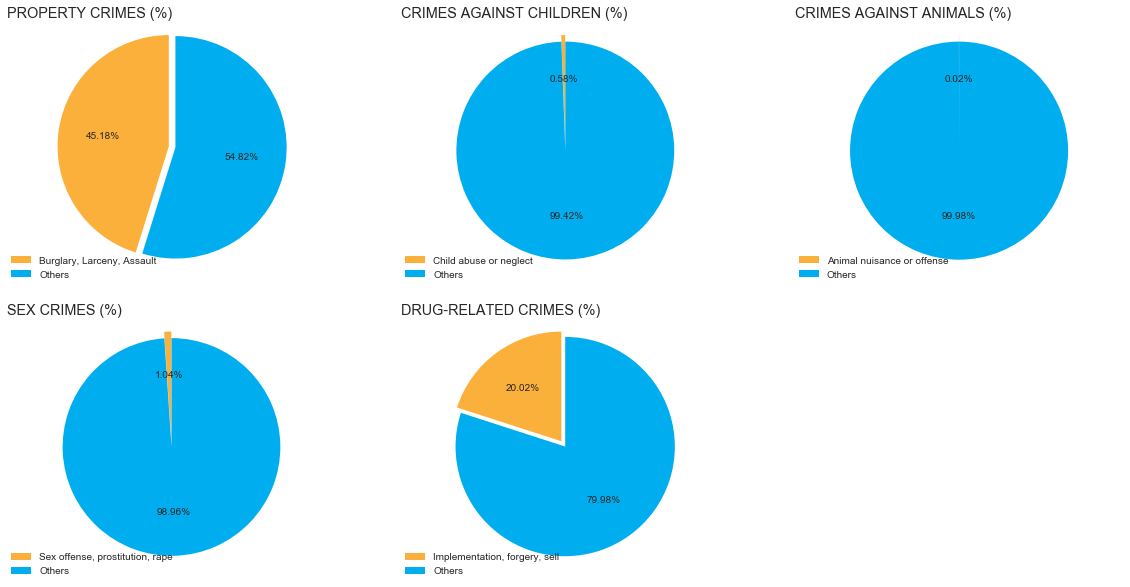

In [104]:
# dataframes
rob = group_classes['Class Description'].str.contains('(ASSAULT|ASSLT|BURG|ROB |THEFT|LARCENY|MISCELLANEOUS|STOLEN)')
sex = group_classes['Class Description'].str.contains('(SEX|RAPE|PROSTITUTION|PORNOGRAPHY|^NOT SEX)')
child = group_classes['Class Description'].str.contains('(CHILD)')
animal = group_classes['Class Description'].str.contains('(ANIMAL)')
drugs = group_classes['Class Description'].str.contains('(CDS|THE INFLUENCE|DRUNK|LIQUOR|OVERDOSE|ALCOHOL)')

# Variables to calculate percentages
total = group_classes['Count'].sum()

crms = [
    {
        'title': 'PROPERTY CRIMES (%)', 
        'labels': ['Burglary, Larceny, Assault', 'Others'],
        'sizes': [group_classes[rob]['Count'].sum()/total, 1 - group_classes[rob]['Count'].sum()/total]
    },
    {
        'title': 'CRIMES AGAINST CHILDREN (%)', 
        'labels': ['Child abuse or neglect', 'Others'], 
        'sizes': [group_classes[child]['Count'].sum()/total, 1 - group_classes[child]['Count'].sum()/total]
    },
    {
        'title': 'CRIMES AGAINST ANIMALS (%)', 
        'labels': ['Animal nuisance or offense', 'Others'], 
        'sizes': [group_classes[animal]['Count'].sum()/total, 1 - group_classes[animal]['Count'].sum()/total]
    },
    {
        'title': 'SEX CRIMES (%)', 
        'labels': ['Sex offense, prostitution, rape', 'Others'], 
        'sizes': [group_classes[sex]['Count'].sum()/total, 1 - group_classes[sex]['Count'].sum()/total]
    },
    {
        'title': 'DRUG-RELATED CRIMES (%)', 
        'labels': ['Implementation, forgery, sell', 'Others'], 
        'sizes': [group_classes[drugs]['Count'].sum()/total, 1 - group_classes[drugs]['Count'].sum()/total]
    }
]


# Charts

fig = plt.figure(figsize=(20, 10))
plt.style.use('ggplot')

for i in range(5):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(crms[i]['title'], loc='left')
    ax.pie(crms[i]['sizes'], autopct='%1.2f%%', explode=(0.06,0),startangle=90, colors=colors)
    ax.axis('equal')
    ax.legend(crms[i]['labels'],loc=(0,-.05))

plt.show()